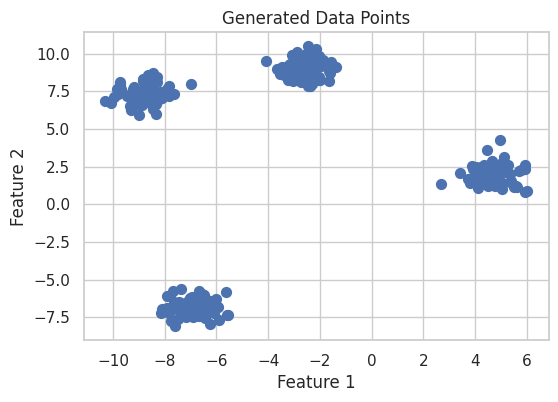

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

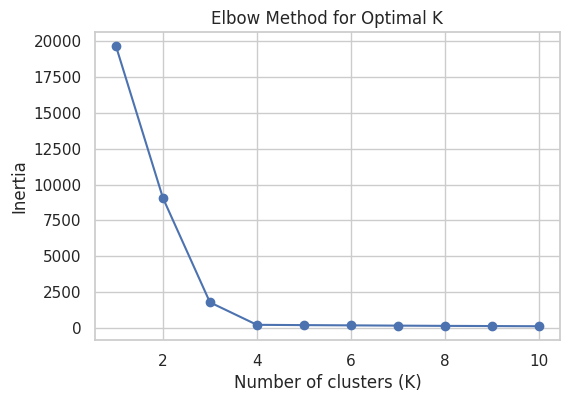

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


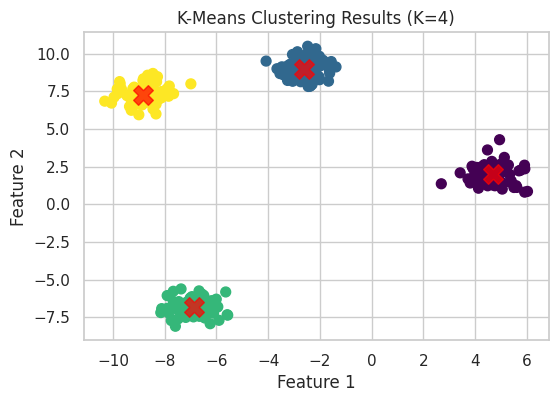

In [33]:
# K-Mean Clustering using elbow method
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import seaborn as sns


sns.set(style="whitegrid")

# Generating sample data with 4 clusters
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Converting to DataFrame
data = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])

# Visualize the data
plt.figure(figsize=(6, 4))
plt.scatter(data["Feature 1"], data["Feature 2"], s=50)
plt.title("Generated Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# List to store inertia values
inertia = []

# varying K values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Inertia = Sum of squared distances to cluster centers

# Plot the Elbow graph
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.show()

# Fit KMeans with optimal K (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster labels to data
data["Cluster"] = y_kmeans

# Get cluster centers
centers = kmeans.cluster_centers_

# Plot clusters
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, marker='X')
plt.title("K-Means Clustering Results (K=4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [34]:
# Implementing all distance measures(euclidean,manhattan,minkowski,cosine,jaccard)
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances, jaccard_score
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Load Dataset
data = load_iris()
X = data.data
df = pd.DataFrame(X, columns=data.feature_names)

# Apply K-Means Clustering
optimal_k = 3  # known for Iris dataset
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Cluster centroids
centroids = kmeans.cluster_centers_

# Take one testing sample
test_sample = X[100].reshape(1, -1)
print("Test Sample:", test_sample)
print("-" * 50)

# Calculate distances/similarities from test sample to all cluster centroids

# Euclidean
euclidean_dist = pairwise_distances(test_sample, centroids, metric='euclidean')[0]

# Manhattan
manhattan_dist = pairwise_distances(test_sample, centroids, metric='manhattan')[0]

# Cosine Similarity (convert to distance by 1 - similarity)
cosine_sim = cosine_similarity(test_sample, centroids)[0]
cosine_dist = 1 - cosine_sim

# Minkowski (p=3)
minkowski_dist = pairwise_distances(test_sample, centroids, metric='minkowski', p=3)[0]

# Jaccard Index (binary conversion)
X_bin = (X > X.mean(axis=0)).astype(int)
test_bin = (test_sample > X.mean(axis=0)).astype(int)
centroids_bin = (centroids > X.mean(axis=0)).astype(int)
jaccard_sim = [jaccard_score(test_bin[0], c) for c in centroids_bin]
jaccard_dist = [1 - s for s in jaccard_sim]

# Combine results into a DataFrame
results = pd.DataFrame({
    'Cluster': range(optimal_k),
    'Euclidean': euclidean_dist,
    'Manhattan': manhattan_dist,
    'Cosine_Similarity': cosine_sim,
    'Cosine_Distance': cosine_dist,
    'Minkowski(p=3)': minkowski_dist,
    'Jaccard_Similarity': jaccard_sim,
    'Jaccard_Distance': jaccard_dist
})

print("\nDistance / Similarity of Test Sample from Cluster Centroids:\n")
print(results.round(4))

# Assign cluster based on minimum distance (or max similarity)
cluster_euclidean = np.argmin(euclidean_dist)
cluster_manhattan = np.argmin(manhattan_dist)
cluster_cosine = np.argmax(cosine_sim)
cluster_minkowski = np.argmin(minkowski_dist)
cluster_jaccard = np.argmax(jaccard_sim)

print("\nPredicted Cluster Based on Different Metrics:")
print(f"Euclidean → Cluster {cluster_euclidean}")
print(f"Manhattan → Cluster {cluster_manhattan}")
print(f"Cosine Similarity → Cluster {cluster_cosine}")
print(f"Minkowski (p=3) → Cluster {cluster_minkowski}")
print(f"Jaccard Index → Cluster {cluster_jaccard}")


Test Sample: [[6.3 3.3 6.  2.5]]
--------------------------------------------------

Distance / Similarity of Test Sample from Cluster Centroids:

   Cluster  Euclidean  Manhattan  Cosine_Similarity  Cosine_Distance  \
0        0     2.0446     3.6226             0.9905           0.0095   
1        1     5.2311     8.2140             0.8681           0.1319   
2        2     0.7773     1.4632             0.9968           0.0032   

   Minkowski(p=3)  Jaccard_Similarity  Jaccard_Distance  
0          1.7746                0.75              0.25  
1          4.7485                0.25              0.75  
2          0.6495                1.00              0.00  

Predicted Cluster Based on Different Metrics:
Euclidean → Cluster 2
Manhattan → Cluster 2
Cosine Similarity → Cluster 2
Minkowski (p=3) → Cluster 2
Jaccard Index → Cluster 2


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


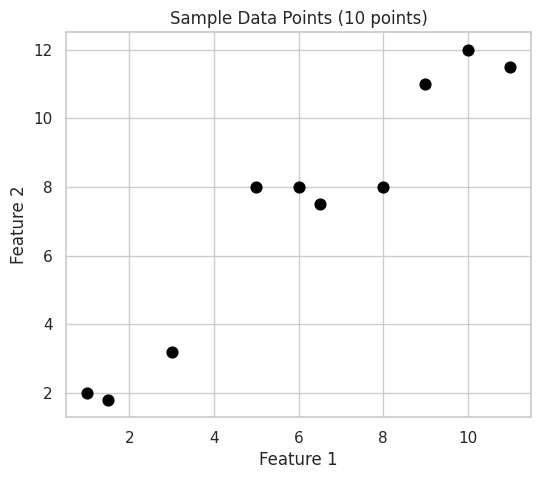

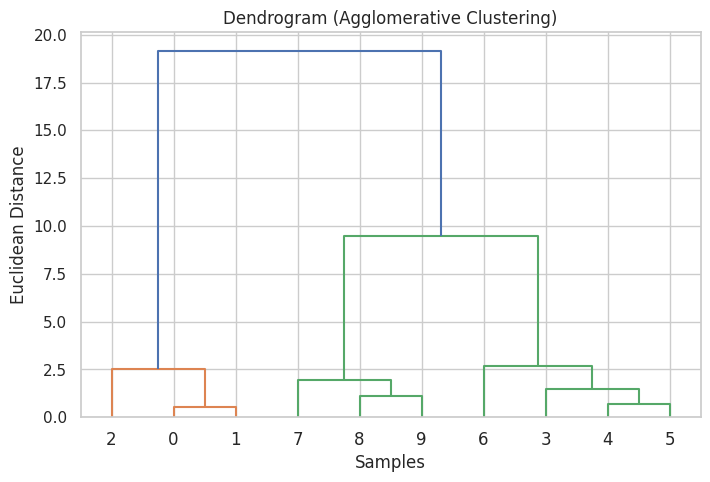

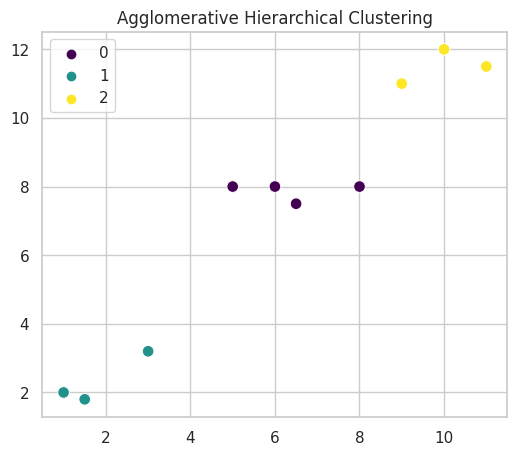

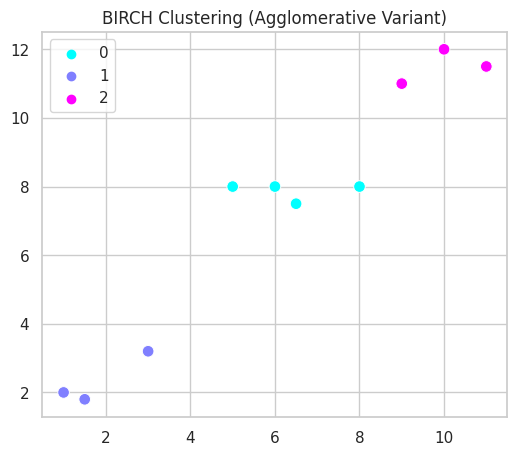

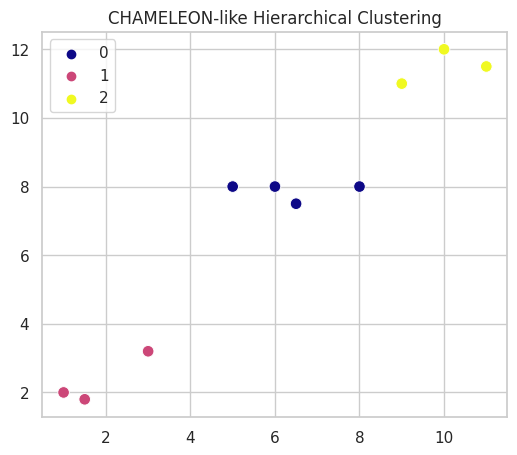

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


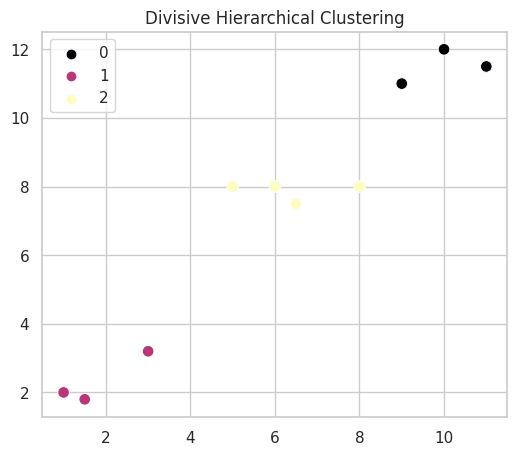

In [35]:
# Implementing hierarchial clustering(Agglomerative-BIRCH,CHEMELON , Divisive )
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, Birch, KMeans
from sklearn.neighbors import kneighbors_graph
from scipy.cluster.hierarchy import dendrogram, linkage

# Create sample data
X = np.array([
    [1, 2], [1.5, 1.8], [3, 3.2],
    [5, 8], [6, 8], [6.5, 7.5],
    [8, 8], [9, 11], [10, 12], [11, 11.5]
])

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c='black', s=60)
plt.title("Sample Data Points (10 points)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# AGGLOMERATIVE CLUSTERING (Basic)
linkage_matrix = linkage(X, method='ward')

plt.figure(figsize=(8, 5))
dendrogram(linkage_matrix)
plt.title("Dendrogram (Agglomerative Clustering)")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg.fit_predict(X)

plt.figure(figsize=(6, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=agg_labels, palette='viridis', s=70)
plt.title("Agglomerative Hierarchical Clustering")
plt.show()

# BIRCH CLUSTERING
birch = Birch(n_clusters=3)
birch_labels = birch.fit_predict(X)

plt.figure(figsize=(6, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=birch_labels, palette='cool', s=70)
plt.title("BIRCH Clustering (Agglomerative Variant)")
plt.show()

# CHAMELEON-LIKE CLUSTERING (Using KNN Graph)
knn_graph = kneighbors_graph(X, n_neighbors=3, include_self=False)
chameleon_like = AgglomerativeClustering(n_clusters=3, connectivity=knn_graph, linkage='ward')
chameleon_labels = chameleon_like.fit_predict(X)

plt.figure(figsize=(6, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=chameleon_labels, palette='plasma', s=70)
plt.title("CHAMELEON-like Hierarchical Clustering")
plt.show()

# DIVISIVE CLUSTERING (Top-Down)
def divisive_clustering(X, max_clusters=3):
    clusters = [np.arange(len(X))]  # store indices of data points
    labels = np.zeros(len(X), dtype=int)
    current_cluster_count = 1

    while current_cluster_count < max_clusters:
        # find the largest cluster to split
        largest_idx = np.argmax([len(c) for c in clusters])
        indices_to_split = clusters.pop(largest_idx)
        if len(indices_to_split) <= 1:
            continue

        # KMeans split into 2
        kmeans = KMeans(n_clusters=2, random_state=42).fit(X[indices_to_split])
        sub_labels = kmeans.labels_

        # assign new cluster IDs
        new_label = max(labels) + 1
        labels[indices_to_split[sub_labels == 1]] = new_label

        # add new clusters
        clusters.append(indices_to_split[sub_labels == 0])
        clusters.append(indices_to_split[sub_labels == 1])
        current_cluster_count = len(np.unique(labels))

    return labels

div_labels = divisive_clustering(X, max_clusters=3)

plt.figure(figsize=(6, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=div_labels, palette='magma', s=70)
plt.title("Divisive Hierarchical Clustering")
plt.show()


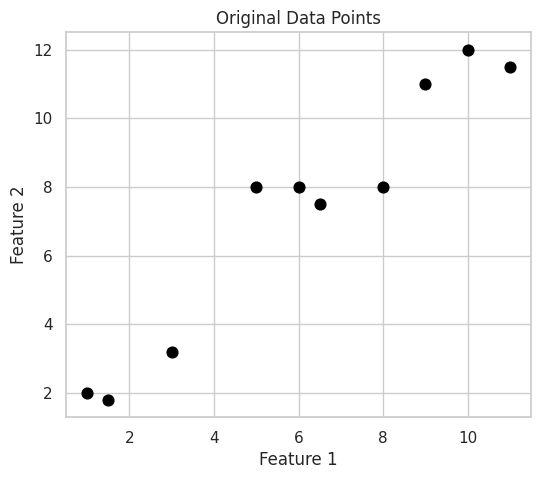

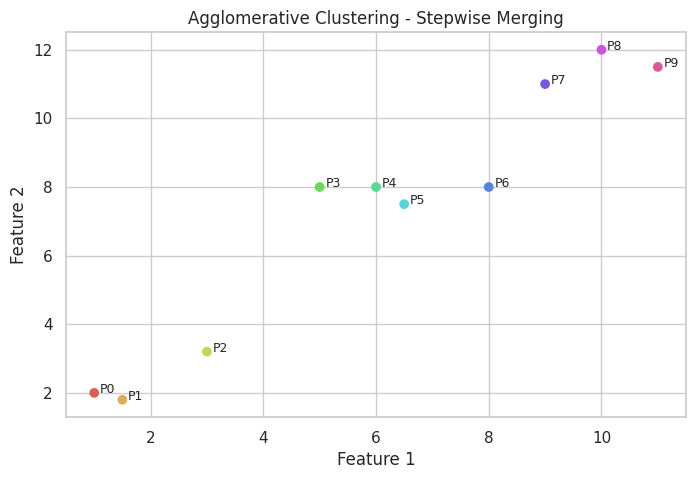

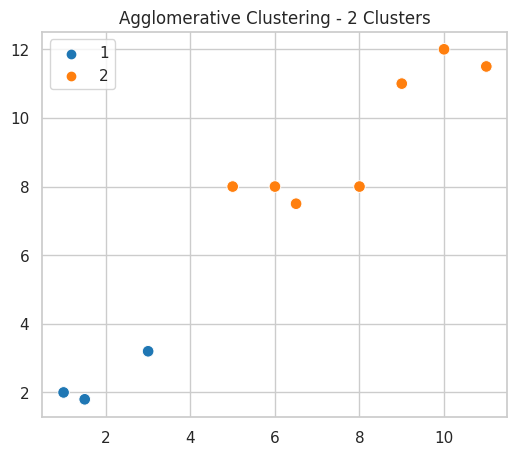

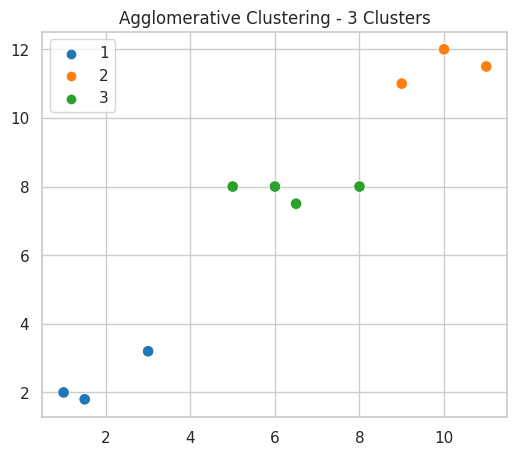

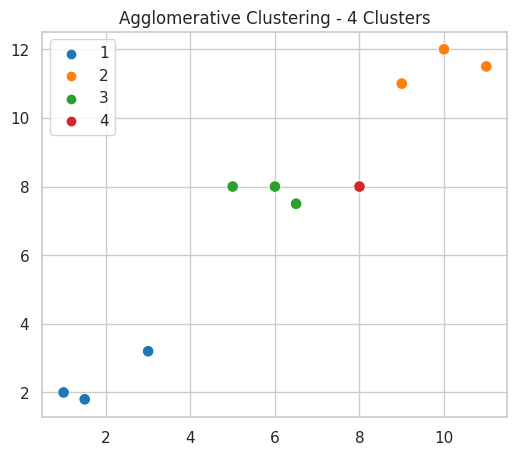

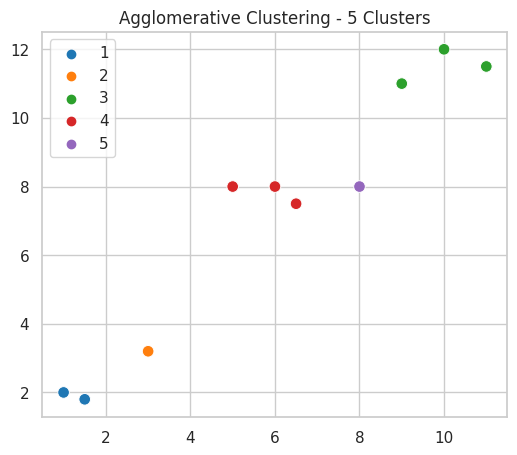

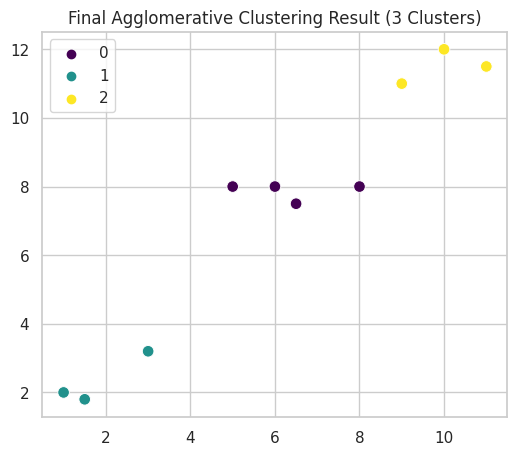


--- BIRCH Incremental Clustering Steps ---


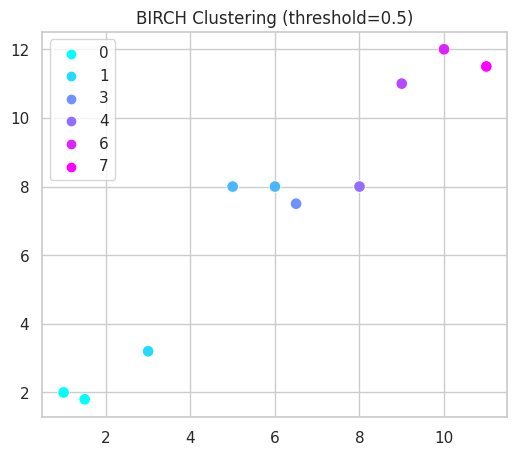

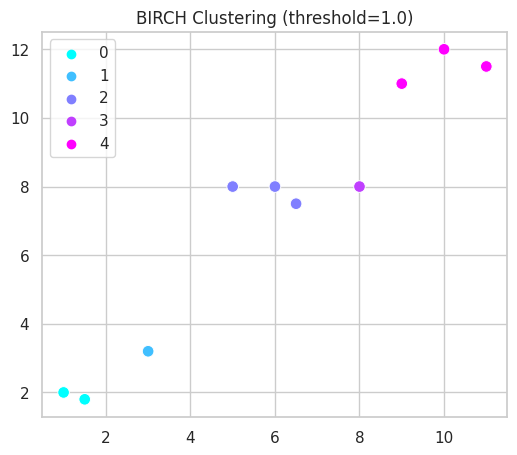

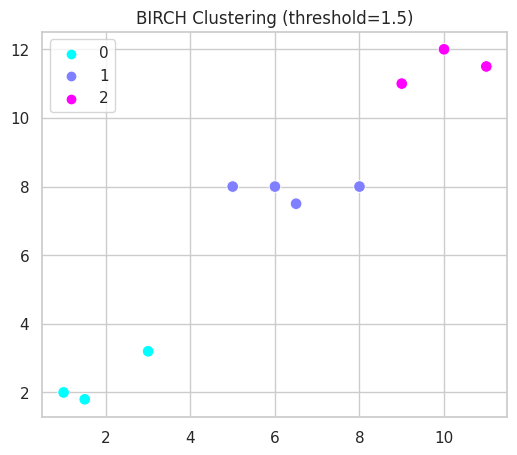

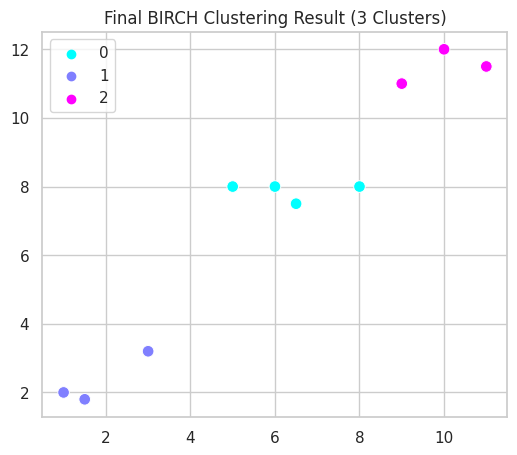

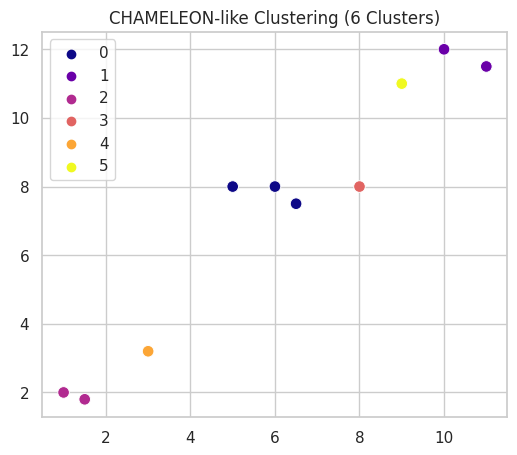

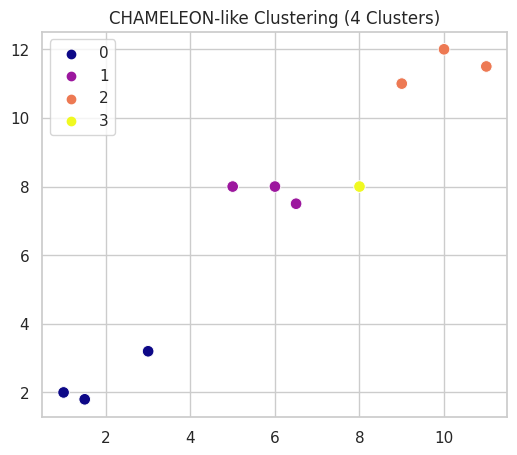

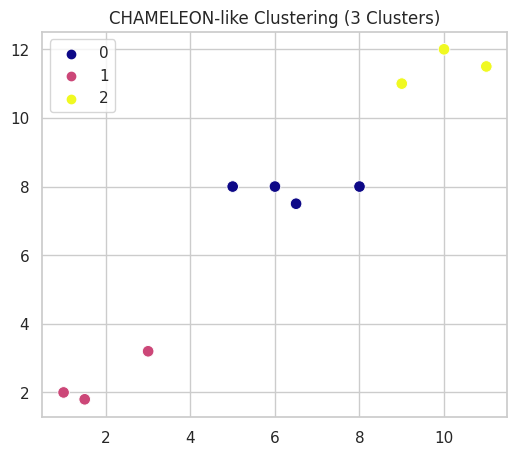

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


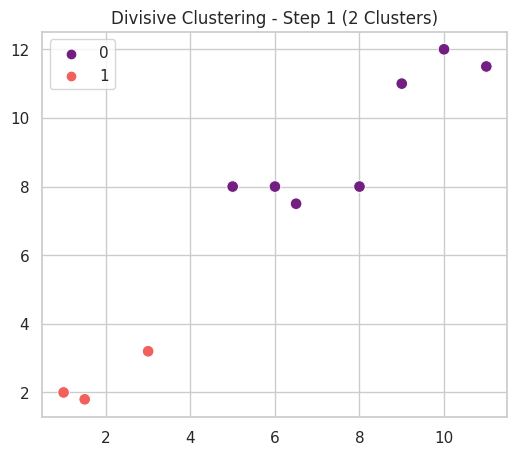

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


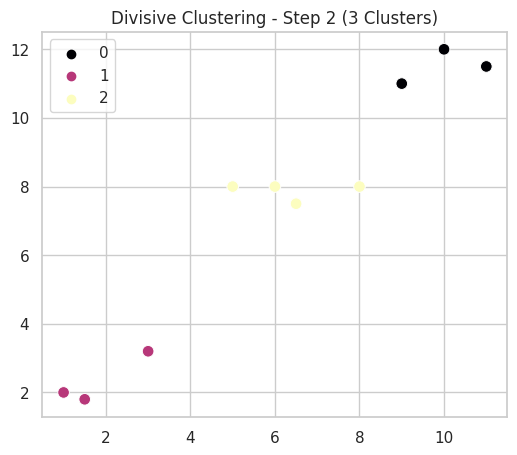

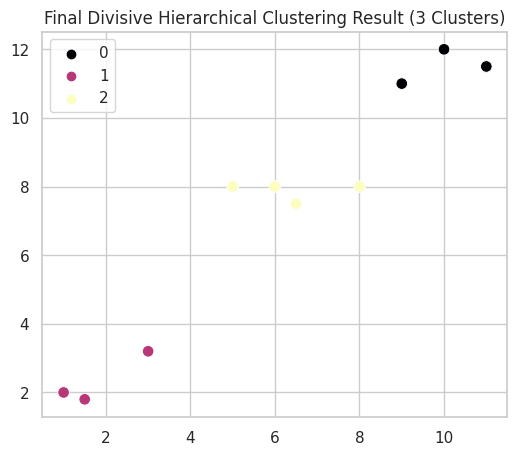

In [36]:
# Implementing hierarchial clustering(Agglomerative-BIRCH,CHEMELON , Divisive ) with intermediate steps
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, Birch, KMeans
from sklearn.neighbors import kneighbors_graph
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
import seaborn as sns

# -----------------------------
# Step 1: Create 10 Sample Data Points
# -----------------------------
X = np.array([
    [1, 2], [1.5, 1.8], [3, 3.2],
    [5, 8], [6, 8], [6.5, 7.5],
    [8, 8], [9, 11], [10, 12], [11, 11.5]
])

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c='black', s=60)
plt.title("Original Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# =====================================================
# AGGLOMERATIVE CLUSTERING (Step-by-Step)
# =====================================================

linkage_matrix = linkage(X, method='ward')

# Visualize step-by-step merges
plt.figure(figsize=(8, 5))
plt.title("Agglomerative Clustering - Stepwise Merging")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Start with individual points
colors = sns.color_palette("hls", len(X))
for i, (x, y) in enumerate(X):
    plt.text(x + 0.1, y, f"P{i}", fontsize=9)
plt.scatter(X[:, 0], X[:, 1], color=colors)

# Show merging at each step
for k in range(2, 6):
    labels = fcluster(linkage_matrix, k, criterion='maxclust')
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='tab10', s=70)
    plt.title(f"Agglomerative Clustering - {k} Clusters")
    plt.show()

# Final clustering result
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg.fit_predict(X)

plt.figure(figsize=(6, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=agg_labels, palette='viridis', s=70)
plt.title("Final Agglomerative Clustering Result (3 Clusters)")
plt.show()

# =====================================================
# BIRCH CLUSTERING (with incremental steps)
# =====================================================
print("\n--- BIRCH Incremental Clustering Steps ---")
for threshold in [0.5, 1.0, 1.5]:
    birch = Birch(n_clusters=None, threshold=threshold)
    birch_labels = birch.fit_predict(X)
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=birch_labels, palette='cool', s=70)
    plt.title(f"BIRCH Clustering (threshold={threshold})")
    plt.show()

# Final BIRCH clustering
birch_final = Birch(n_clusters=3)
birch_labels_final = birch_final.fit_predict(X)
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=birch_labels_final, palette='cool', s=70)
plt.title("Final BIRCH Clustering Result (3 Clusters)")
plt.show()

# =====================================================
# CHAMELEON-LIKE CLUSTERING (KNN + Agglomerative)
# =====================================================
knn_graph = kneighbors_graph(X, n_neighbors=3, include_self=False)
for k in [6, 4, 3]:
    chameleon_like = AgglomerativeClustering(n_clusters=k, connectivity=knn_graph, linkage='ward')
    chameleon_labels = chameleon_like.fit_predict(X)
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=chameleon_labels, palette='plasma', s=70)
    plt.title(f"CHAMELEON-like Clustering ({k} Clusters)")
    plt.show()

# =====================================================
# DIVISIVE CLUSTERING (Top-Down Step-by-Step)
# =====================================================
def divisive_clustering_steps(X, max_clusters=3):
    clusters = [np.arange(len(X))]
    labels = np.zeros(len(X), dtype=int)
    current_clusters = 1

    step = 1
    while current_clusters < max_clusters:
        largest_idx = np.argmax([len(c) for c in clusters])
        indices = clusters.pop(largest_idx)
        if len(indices) <= 1:
            continue

        # Split with KMeans
        kmeans = KMeans(n_clusters=2, random_state=42).fit(X[indices])
        sub_labels = kmeans.labels_

        # Assign labels
        new_label = max(labels) + 1
        labels[indices[sub_labels == 1]] = new_label

        clusters.append(indices[sub_labels == 0])
        clusters.append(indices[sub_labels == 1])
        current_clusters = len(np.unique(labels))

        # Visualize intermediate step
        plt.figure(figsize=(6, 5))
        sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='magma', s=70)
        plt.title(f"Divisive Clustering - Step {step} ({current_clusters} Clusters)")
        plt.show()
        step += 1

    return labels

div_labels = divisive_clustering_steps(X, max_clusters=3)

plt.figure(figsize=(6, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=div_labels, palette='magma', s=70)
plt.title("Final Divisive Hierarchical Clustering Result (3 Clusters)")
plt.show()

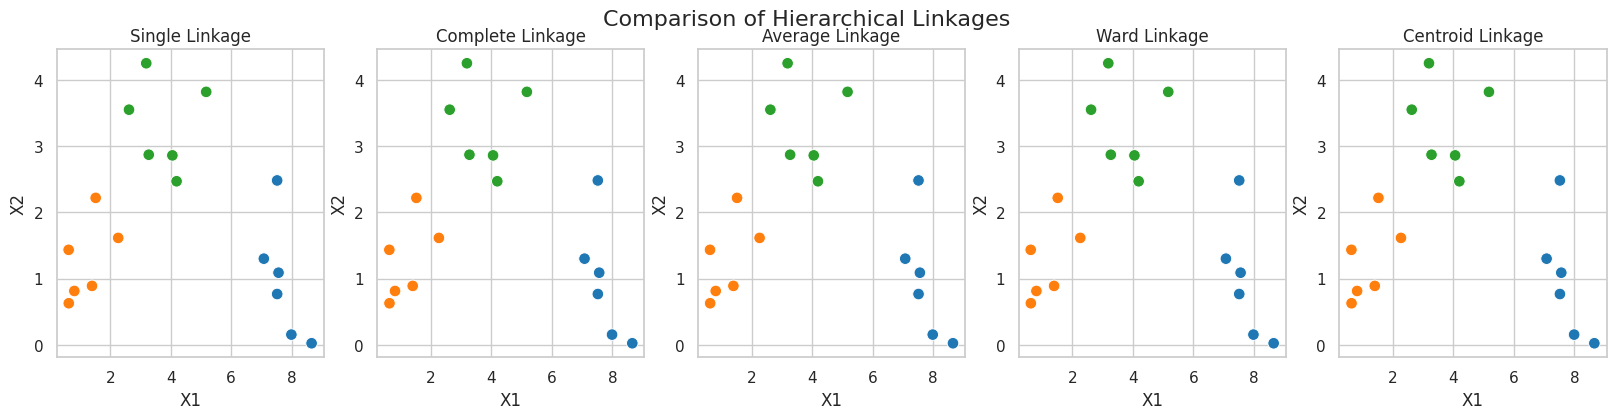

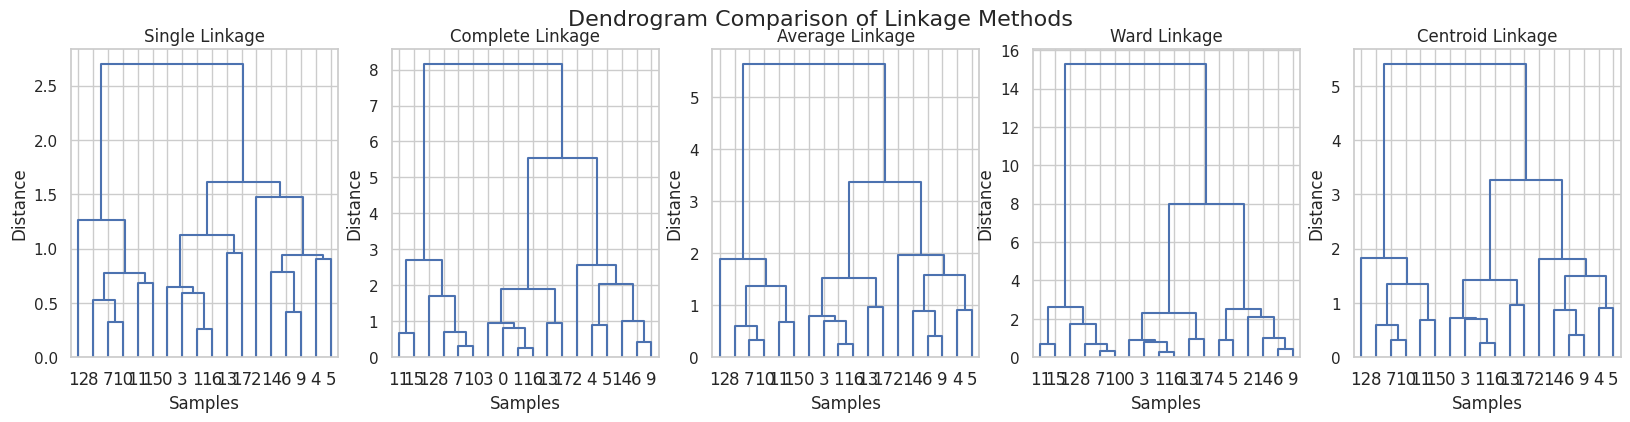

In [37]:
# ---Implementing different types of Linkages-----
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np
from sklearn.datasets import make_blobs

# Generate overlapping dataset
np.random.seed(42)
X, y = make_blobs(n_samples=18, centers=[[1,1],[4,4],[8,1]], cluster_std=[0.8,0.8,0.8])

# List of linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward', 'centroid']

plt.figure(figsize=(20,4))

for i, method in enumerate(linkage_methods):
    Z = linkage(X, method=method)
    clusters = fcluster(Z, 3, criterion='maxclust')
    
    plt.subplot(1,5,i+1)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=clusters, palette='tab10', s=70, legend=False)
    plt.title(f"{method.capitalize()} Linkage")
    plt.xlabel("X1")
    plt.ylabel("X2")
    
plt.suptitle("Comparison of Hierarchical Linkages", fontsize=16)
plt.show()


plt.figure(figsize=(20,4))

for i, method in enumerate(linkage_methods):
    Z = linkage(X, method=method)
    plt.subplot(1,5,i+1)
    dendrogram(Z, color_threshold=0)
    plt.title(f"{method.capitalize()} Linkage")
    plt.xlabel("Samples")
    plt.ylabel("Distance")

plt.suptitle("Dendrogram Comparison of Linkage Methods", fontsize=16)
plt.show()


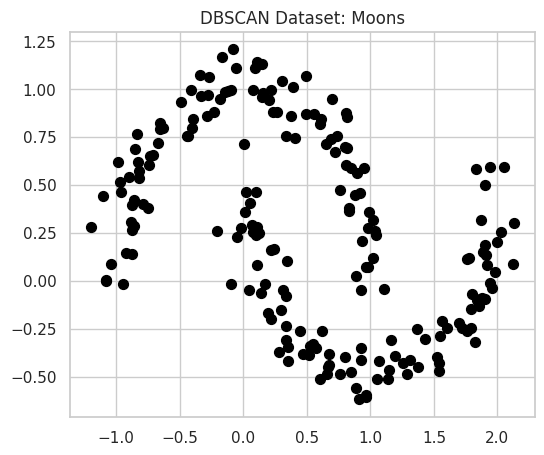

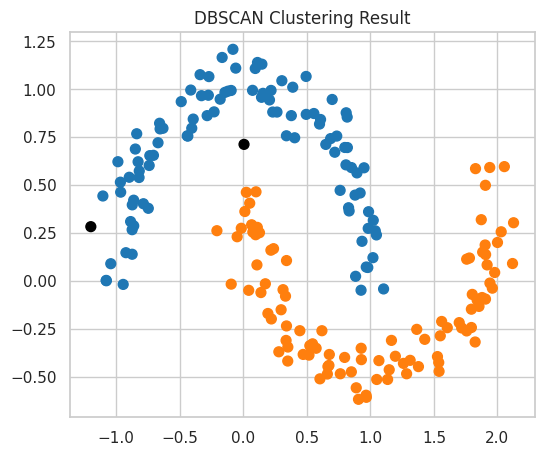

Estimated clusters: 2
Estimated noise points: 2


In [38]:
# -----DBSCAN Clustering------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate dataset
X, y_true = make_moons(n_samples=200, noise=0.09, random_state=42)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c='black', s=50)
plt.title("DBSCAN Dataset: Moons")
plt.show()

# Apply DBSCAN
# [ eps = max distance between two samples to be considered neighbors
# min_samples = min points to form a dense region ]
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(6,5))
unique_labels = set(labels)
colors = [plt.cm.tab10(i) if i != -1 else (0,0,0) for i in labels]  # noise = black
plt.scatter(X[:,0], X[:,1], c=colors, s=50)
plt.title("DBSCAN Clustering Result")
plt.show()

# Print number of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"Estimated clusters: {n_clusters}")
print(f"Estimated noise points: {n_noise}")


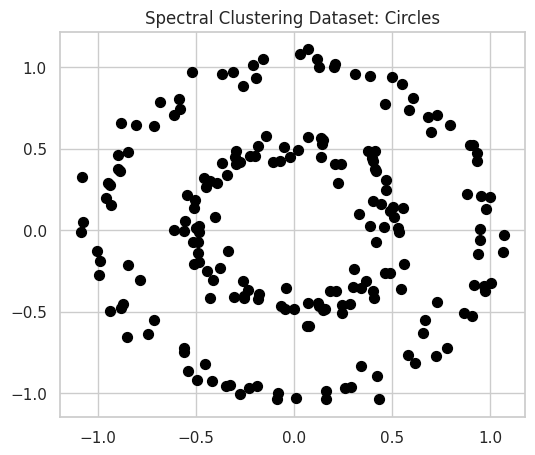

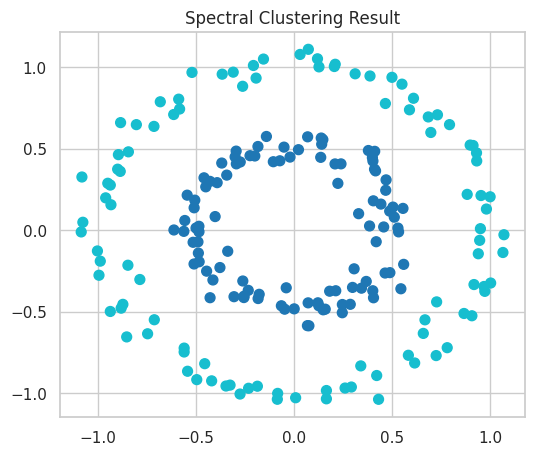

In [39]:
# ----Spectral Clustering-----
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import SpectralClustering

# Generating dataset
X, y_true = make_circles(n_samples=200, factor=0.5, noise=0.06, random_state=42)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c='black', s=50)
plt.title("Spectral Clustering Dataset: Circles")
plt.show()

# Apply Spectral Clustering

spectral = SpectralClustering(
    n_clusters=2,       # number of clusters to find
    affinity='nearest_neighbors',  # builds similarity graph
    n_neighbors=10,
    assign_labels='kmeans',
    random_state=42
)
labels = spectral.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10', s=50)
plt.title("Spectral Clustering Result")
plt.show()
